In [1]:
# Random Forest with Chi Square Feature Selection

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
train_data = pd.read_csv(r"C:\Users\Brad\OneDrive - Ashesi University\Desktop\Ashesi University\Senior Year Sem 2\Capstone 2\Data\chisq_train_data_2.csv")

In [4]:
damage_labels = [1, 2, 3]

In [5]:
#Minimum sample count
min_count = np.inf
for label in damage_labels:
    count = (train_data["damage_grade"] == label).sum()
    if count < min_count:
        min_count = count

In [6]:
print(min_count)

25124


In [7]:
# Selecting random number of samples equal to the min sample count
bal_train_data = pd.concat([train_data[train_data["damage_grade"] == label].sample(min_count) for label in damage_labels])
train_data = bal_train_data

In [8]:
train_data.head()

,count_floors_pre_eq,roof_type,ground_floor_type,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_cement_mortar_brick,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_secondary_use_hotel,has_secondary_use_rental,damage_grade
206542,2,q,v,0,0,1,0,0,1,0,1
207912,2,n,v,0,0,1,0,0,0,0,1
98039,2,n,v,0,0,1,0,0,0,1,1
140717,2,n,f,0,1,0,0,0,0,0,1
58991,2,n,f,0,0,0,0,0,0,0,1


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
train_data["roof_type"] = encoder.fit_transform(train_data["roof_type"])
train_data["ground_floor_type"] = encoder.fit_transform(train_data["ground_floor_type"])

In [11]:
train_data.head()

,count_floors_pre_eq,roof_type,ground_floor_type,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_cement_mortar_brick,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_secondary_use_hotel,has_secondary_use_rental,damage_grade
206542,2,1,2,0,0,1,0,0,1,0,1
207912,2,0,2,0,0,1,0,0,0,0,1
98039,2,0,2,0,0,1,0,0,0,1,1
140717,2,0,0,0,1,0,0,0,0,0,1
58991,2,0,0,0,0,0,0,0,0,0,1


In [12]:
x = train_data.iloc[:, :-1].values
y = train_data.iloc[:,10].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           1       0.75      0.64      0.69      5075
           2       0.43      0.40      0.41      5110
           3       0.47      0.58      0.52      4890

    accuracy                           0.54     15075
   macro avg       0.55      0.54      0.54     15075
weighted avg       0.55      0.54      0.54     15075



In [17]:
#Model based Feature Selection

from sklearn.feature_selection import SelectFromModel
fs = SelectFromModel(classifier, threshold='median')
fs.fit(X_train,y_train)
fs_features = fs.transform(X_train)

In [18]:
# Print the indices of the selected features
print(fs.get_support(indices=True))

[0 1 2 4 5]


In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

axis_tick_labels = ['Grade 1', 'Grade 2', 'Grade 3']


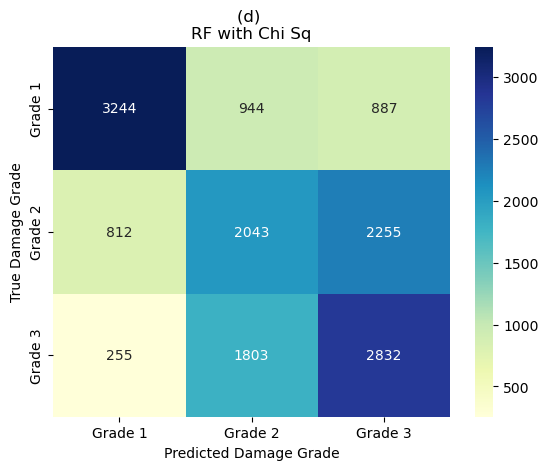

In [25]:
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d", xticklabels=axis_tick_labels, yticklabels=axis_tick_labels)
# plt.title("RF with Chi Square FS Prediction Matrix")
plt.title("(d) \nRF with Chi Sq")
plt.xlabel("Predicted Damage Grade")
plt.ylabel("True Damage Grade")
plt.show()

In [21]:
from sklearn.tree import export_text

In [22]:
features_data = train_data.drop(columns=['damage_grade'], axis=1)

In [23]:
# # Print out the decision trees in the random forest
# for i, tree in enumerate(classifier.estimators_):
#     r = export_text(tree, feature_names=features_data.columns.tolist())
#     print(f"Decision Tree {i}:\n{r}")

# tree = classifier.estimators_[0]
# r = export_text(tree, feature_names=features_data.columns.tolist())
# print(f"Decision Tree {0}:\n{r}")